## Comparing between ATL_CTH_2A and AC__TC__2B

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class_path = 'ECA_EXAC_AC__TC__2B_20250525T233634Z_20250526T013942Z_05633C.h5'
cth_path = 'ECA_EXAE_ATL_CTH_2A_20250525T234738Z_20250526T014141Z_05633D.h5'

In [3]:
with open('structure_AC__TC__2B.txt', 'w') as out_file:
    with h5py.File(class_path, 'r') as f:
        def print_structure(name, obj):
            if isinstance(obj, h5py.Group):
                out_file.write(f"[Group] {name}\n")
            elif isinstance(obj, h5py.Dataset):
                out_file.write(f"[Dataset] {name} - shape: {obj.shape}, dtype: {obj.dtype}\n")
        f.visititems(print_structure)


In [11]:
with open('structure_ATL_CTH_2A.txt', 'w') as out_file:
    with h5py.File(cth_path, 'r') as f:

        def print_structure(name, obj):
            if isinstance(obj, h5py.Group):
                out_file.write(f"[Group] {name}\n")
            elif isinstance(obj, h5py.Dataset):
                out_file.write(f"[Dataset] {name} - shape: {obj.shape}, dtype: {obj.dtype}\n")

            # Write attributes for both groups and datasets
            for key, val in obj.attrs.items():
                out_file.write(f"    [attr] {key}: {val}\n")

        f.visititems(print_structure)

        # Also include root-level (file) attributes, if any
        if f.attrs:
            out_file.write("\n[File-level Attributes]\n")
            for key, val in f.attrs.items():
                out_file.write(f"    [attr] {key}: {val}\n")


In [8]:
with h5py.File(cth_path, 'r') as f:
    dataset_path = 'ScienceData/ATLID_cloud_top_height'
    cth_data = np.array(f[dataset_path][()])

    time_path = 'ScienceData/time'
    time_data = np.array(f[time_path][()])


In [13]:
mask = cth_data != 9.96921e+36
cth_data_filtered = cth_data[mask]/1000 # convert to km
time_data_filtered = time_data[mask]

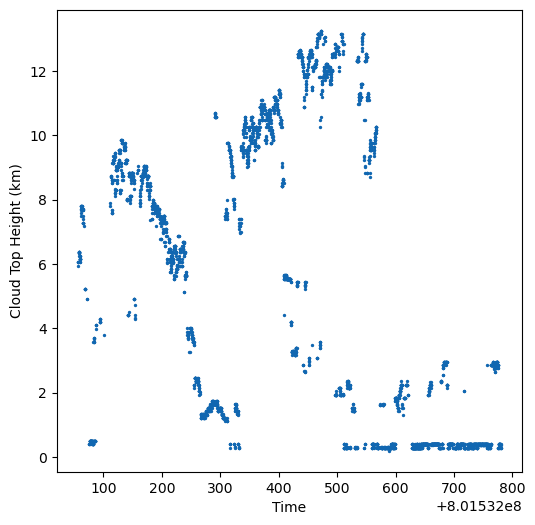

In [16]:
plt.figure(figsize=(6, 6))

plt.scatter(time_data_filtered, cth_data_filtered, color='#1167b1', marker='o', s=2)

plt.title("")
plt.xlabel("Time")
plt.ylabel("Cloud Top Height (km)")

plt.show()